# **Getting the workspace ready**



1.   Importing TensorFlow & TensorFlow Hub
2.   Check that the GPU is well configured in Google Collab



In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Importing TensorFlow and TensorFlow Hub
import tensorflow as tf
import tensorflow_hub as hub
print("TF version is : ", tf.__version__)
print("TF Hub version is : ", hub.__version__)

# Make sur we're using a GPU
if tf.config.list_physical_devices("GPU"):
  print('GPU Used')

TF version is :  2.17.0
TF Hub version is :  0.16.1


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# **Getting Data ready**

Since we've got the image ID's and their labels in a DataFrame (labels_csv), we'll use it to create:

*   A list a filepaths to training images
*   An array of all unique labels
*   An array of all labels. Labels will be transformed to numerical format. label = [ 0, 0, 0, 1, 0,...]

In [2]:
import pandas as pd
import numpy as np

In [3]:
# read the csv labels
labels_csv = pd.read_csv('/content/drive/MyDrive/dog_breed_dataset/labels.csv')

# get the images filenames
filenames = ['/content/drive/My Drive/dog_breed_dataset/train/'+file+'.jpg' for file in labels_csv.id]
print('FileName 6000 is : {}\n'.format(filenames[6000]))

# get string labels
string_labels = np.array(labels_csv.breed)
print('Label number 6000 is : {}\n'.format(string_labels[6000]))

# get a list of unique labels
unique_labels = np.unique(string_labels)
print('The list of unique labels has a length of {} and is {}\n'.format(len(unique_labels), unique_labels))

FileName 6000 is : /content/drive/My Drive/dog_breed_dataset/train/974eb81110fd75acbc0a9aeb489439dc.jpg

Label number 6000 is : french_bulldog

The list of unique labels has a length of 120 and is ['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_

In [7]:
import shutil
import os

save_path = '/content/drive/MyDrive/dog_breed_dataset/unique_breeds'
# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Loop through the unique labels and save one image for each breed
for label in unique_labels:
    # Get the index of the first image with the current label
    index = np.where(string_labels == label)[0][0]

    # Get the filename of the image
    filename = filenames[index]

    # Define the destination path
    dest_path = os.path.join(save_path, f'{label}.jpg')

    # Copy the image to the unique_breeds directory
    shutil.copy(filename, dest_path)


# **Transforming labels into one-hot array**

Transform our labels from string format to numerical vector, a one-hot array

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_labels) for label in string_labels]
print(string_labels[6000])
print(boolean_labels[6000])
print(boolean_labels[6000].astype(int))

french_bulldog
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# **Creating our own validation set**

Since the dataset from Kaggle doesn't come with a validation set let's make one from the train set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

Computing with 10,000+ images could take a fairly long time. So it's a good idea to work with a portion of them to make sure things are working before training on them all. Let's start experimenting with **1000** and increase it as we need.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 10000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

10000

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2)
print(len(X_train), len(y_train), len(X_valid), len(y_valid))
print(X_train[0])
print(y_train[0])

8000 8000 2000 2000
/content/drive/My Drive/dog_breed_dataset/train/007b8a07882822475a4ce6581e70b1f8.jpg
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


## **Preprocessing images (Turning images to Tensors)**

**Why We Do This**

Before we feed images into our neural network, we need to convert them into a format that TensorFlow can work with: ***Tensors***.
* Think of Tensors like super-powered NumPy arrays that can be processed on GPUs, making everything much faster.

In [ ]:
# Define image size
IMG_SIZE = 224

In [ ]:
def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor
  # The channels=3 part means we're keeping the color information (red, green, blue).
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

By doing all this, we're preparing our data in a format that our neural network can understand and learn from efficiently. It ensures the images are consistent in size and normalized, making the training process smoother and more effective.

# **Creating data batches or chunks**

**Why We Do This**

When you have a huge dataset (like 10,000+ images), trying to process everything at once can overwhelm your system's memory, especially if you're using a GPU. Instead, we split the data into smaller batches, typically of 32 images at a time, and process these batches sequentially. This makes our computations more efficient and prevents memory errors.

In [ ]:
# Define the batch size, 32 is a good default, we will have 32 images in each batch
BATCH_SIZE = 32

In [ ]:
# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  x : array of images filepath
  y : array of images label
  batch_size : size of the batch we want to create
  valid_data, test_data : to specify the type of dataset we want to create

  Creates batches from pairs of image (x) and label (y).
  Shuffles the data if it's training data . Doesn't shuffle it if it's validation data.
  In test data we use only images (no labels)
  """
  # If the data is a test dataset, we don't have labels
  if test_data:
    # Get the slices of an array in the form of tensors, we only pass filepaths
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    # Preprocess each image object with our 'process_image' function
    data = data.map(process_image)
    # Turn our data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    # Get the slices of an array in the form of tensors, we pass filepaths and labels
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    # Preprocess each (image, label) object with our 'get_image_label' function
    data = data.map(get_image_label)
    # Turn our data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

  else:
    # Get the slices of an array in the form of tensors, we pass filepaths and labels
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Preprocess each image object with our 'process_image' function
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_valid, y_valid, valid_data=True)

By organizing our data into batches, we make the training process more manageable and efficient. Each batch contains a small subset of the data, making it easier for our model to process and learn from without running into memory issues.

# **Visualizing data batches**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """ Displays 25 images from a data batch. """
  plt.figure(figsize=(12, 12))

  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    # Add the image label as the title
    plt.title(unique_labels[labels[i].argmax()])

[[[0.27746984 0.30099925 0.30099925]
  [0.27962187 0.30315128 0.30315128]
  [0.2777332  0.30126262 0.30126262]
  ...
  [0.17592782 0.18314074 0.17890406]
  [0.15863964 0.17943802 0.16196594]
  [0.22265157 0.25010255 0.22265157]]

 [[0.27633056 0.29985997 0.29985997]
  [0.27962187 0.30315128 0.30315128]
  [0.2806922  0.3042216  0.3042216 ]
  ...
  [0.16098557 0.1681985  0.16396183]
  [0.1638249  0.1846233  0.1671512 ]
  [0.22248183 0.24993281 0.22248183]]

 [[0.27633056 0.29985997 0.29985997]
  [0.28034207 0.30387148 0.30387148]
  [0.28554797 0.30907738 0.30907738]
  ...
  [0.1681897  0.17547086 0.16946778]
  [0.18729858 0.20809697 0.18397228]
  [0.23719904 0.26465002 0.23719904]]

 ...

 [[0.53297526 0.30813256 0.23427938]
  [0.59074163 0.3728278  0.305441  ]
  [0.51711094 0.30926785 0.23930986]
  ...
  [0.6616091  0.61376953 0.4278766 ]
  [0.68379724 0.60424495 0.42052248]
  [0.68712354 0.60424495 0.41908225]]

 [[0.62756455 0.3910623  0.3208807 ]
  [0.5871943  0.36019516 0.29518297]


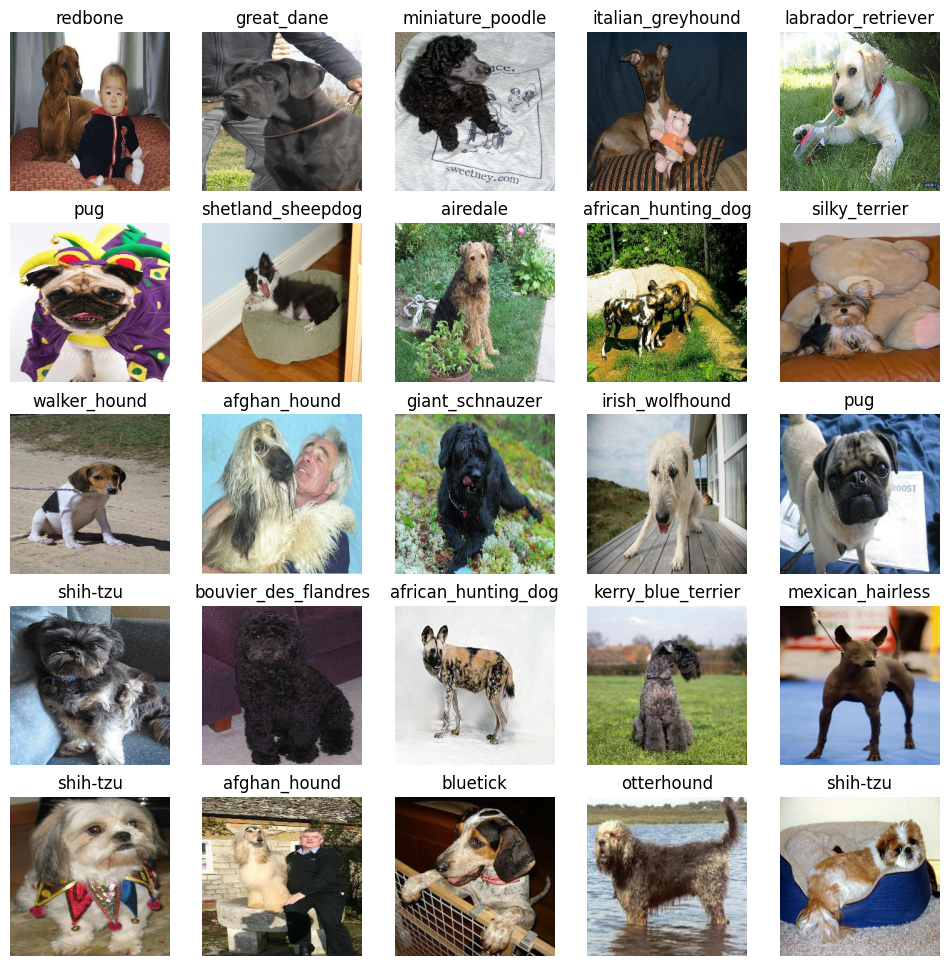

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
print(train_images[0])
print(train_labels[0])
show_25_images(train_images, train_labels)

# **Creating a model**


**Why Use a Pre-trained Model?**

Using a pre-trained model is like standing on the shoulders of giants. These models have already learned a lot from a massive amount of data. Instead of training from scratch, we can use this "knowledge" and adapt it to our specific problem, which is called transfer learning. This saves us a lot of time and computational resources.

**Our Task**

We're working on image classification, so we'll use a model that's already good at this. TensorFlow Hub has a collection of these models. We'll pick one called mobilenet_v2_130_224 because it's designed for image classification and expects images of size 224x224.

In [ ]:
# Setup input shape to the model = batch, height, width, colour channels
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup output shape of the model = number of unique labels
OUTPUT_SHAPE = len(unique_labels)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
import tf_keras

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # We define the model layers
  model = tf_keras.Sequential([
    # Layer 1 (input layer)
    hub.KerasLayer(MODEL_URL),
    # Layer 2 (output layer)
    tf_keras.layers.Dense(units=OUTPUT_SHAPE,   activation="softmax")
  ])

  # Compile the model, we define how the model is going to learn
  model.compile(
      loss=tf_keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf_keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

# **Compiling and Building the model**

**Compiling the Model**

When we compile our model, we're basically setting the rules for how our model will learn from the data. Here are the three key parts:

* **Loss:** Think of this as how wrong our model's predictions are. The goal is to get this as close to zero as possible. If the loss is zero, our model is perfect (which almost never happens, but we try to get close).
* **Optimizer:** This is like your smart friend named Adam, who helps you figure out how to improve your model's guesses. We're using the Adam optimizer because it's generally reliable and works well with most models. There are other optimizers too, like RMSprop and Stochastic Gradient Descent, but Adam is a good all-rounder.
* **Metrics:** These are the things we want to track during training. In our case, we're keeping an eye on accuracy because we want our model to make correct predictions as often as possible.

**Building the Model**

After compiling, we need to tell our model what kind of input shape it should expect. This is important because it helps the model understand the structure of the data it will process.

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


The bulk of the work has already been done by the pre-trained model, and our job is to **fine-tune** it to adapt it to our specific problem. This way, we leverage the powerful features of a pre-trained model while customizing it for our own needs.

# **Creating callbacks**

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving. The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

In [ ]:
import datetime
import os

### TensorBoard Callback
TensorBoard is like a dashboard for your model. It provides a visual way to see how your model is performing during and after training. You can track things like loss and accuracy over time.

In [ ]:
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/dog_breed_dataset/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf_keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback
Early Stopping is like a safety mechanism to prevent your model from overfitting. Overfitting happens when your model learns the training data too well and performs poorly on new data. Early Stopping watches your model's performance on a validation set and stops training if it stops improving after a certain number of rounds.

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

# **Training a model (on a subset of data)**

Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data. We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is NUM_EPOCHS. NUM_EPOCHS defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If **NUM_EPOCHS=1**, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. What's a good value for NUM_EPOCHS?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set NUM_EPOCHS to 100 but our model stops improving after 22 epochs, it'll stop training.

In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 90 #@param {type:"slider", min:10, max:100, step:10}


Let's create a simple function which trains a model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """ Trains a given model and returns the trained version. """

  # Create a model
  model = create_model()

  # Create new TensorBoard session/logs_directory everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=1,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
# Fit the model to the data
#model = train_model()

# **Model Learning and Overfitting**

# **Making and Evaluating Predictions Using a Trained Model**
Now that our model is trained, we can make predictions and evaluate its performance in a more detailed manner. Let's see how our model performs on the validation set.

### Making Predictions
To make predictions, we use the predict() method of our trained model. This method will return an array of arrays, each containing probabilities for each class (dog breed in our case).

In [ ]:
#predictions  = model.predict(val_data)

In [ ]:
# Print an example prediction
#index = 0
#print("Predictions probabilities array is {}\n".format(predictions[index]))
#print("Max probability value : {}\n".format(np.max(predictions[index])))
#print("Index of the maximum probability value : {}\n".format(np.argmax(predictions[index])))
#print("Sum of the probabilities values : {}\n".format(np.sum(predictions[index])))
#print('Predicted labels is : {}\n'.format(unique_labels[np.argmax(predictions[index])]))

### Converting Probabilities to Labels
We convert the array of probabilities into actual labels using np.argmax(), which returns the index of the highest probability. We then use this index to get the corresponding label from unique_labels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """  Turns an array of prediction probabilities into a label. """
  return unique_labels[np.argmax(prediction_probabilities)]

#get_pred_label(predictions[96])

### Unbatching the Validation Data
Our validation data is in batched form, so we need to unbatch it to get individual images and labels. This will help us plot and compare the predicted labels with the true labels.

In [ ]:
def unbatchify(data):
    """ Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.  """
    data_as_list = list(data.unbatch().as_numpy_iterator())
    images = [ ]
    true_labels = [ ]
    for image, label in data_as_list:
      images.append(image)
      true_labels.append(get_pred_label(label))
    return images, true_labels

#images, true_labels = unbatchify(val_data)
#true_labels[:1]

### Visualizing Predictions
To better understand the performance, we can visualize some validation images along with their predicted and true labels.

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(images, true_labels, pred_labels, n=10):
    """Plots a sample of n images with their true and predicted labels."""
    plt.figure(figsize=(15, 10))
    for i in range(n):
        ax = plt.subplot(2, n//2, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
        plt.axis("off")


In [ ]:
# Get predicted labels
#pred_labels = [get_pred_label(pred) for pred in predictions]

# Plot the first 10 images with their true and predicted labels
#plot_predictions(images, true_labels, pred_labels, n=10)
#plt.show()

# **Training the model on the full dataset**
Our training went good on a subset of the data, we can now train it one on the full data.



In [ ]:
# Full training data set => 10,000 images and labels.
print(len(X), len(y))
print(X[0], y[0])

10222 10222
/content/drive/My Drive/dog_breed_dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg [False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [ ]:
# Turn the full training data in a data batch
full_data = create_data_batches(X, y)

# Instantiate a new model for training on the full dataset
full_model = create_model()

# Create callbacks
full_model_tensorboard = create_tensorboard_callback()  # TensorBoard callback
full_model_early_stopping = tf_keras.callbacks.EarlyStopping(monitor="accuracy",  # Early stopping callback
                                                             patience=3)

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Fit the full model to the full training data
#full_model.fit(x=full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard,  full_model_early_stopping])

# **Checking the TensorBoard logs**

Now our model has been trained, we can make its performance visual by checking the TensorBoard logs. The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

In [ ]:
# We load TensorBoard to monitor the model whilst it trains (should update every 30-seconds).
#%tensorboard --logdir '/content/drive/MyDrive/dog_breed_dataset/logs/20240805-104431'

In [ ]:
full_predictions  = full_model.predict(val_data)

In [ ]:
# Print an example prediction
index = 0
print("Predictions probabilities array is {}\n".format(full_predictions[index]))
print("Max probability value : {}\n".format(np.max(full_predictions[index])))
print("Index of the maximum probability value : {}\n".format(np.argmax(full_predictions[index])))
print("Sum of the probabilities values : {}\n".format(np.sum(full_predictions[index])))
print('Predicted labels is : {}\n'.format(unique_labels[np.argmax(full_predictions[index])]))

In [ ]:
images, true_labels = unbatchify(val_data)
true_labels[:1]

In [ ]:
# Get predicted labels
pred_labels = [get_pred_label(pred) for pred in full_predictions]

# Plot the first 10 images with their true and predicted labels
plot_predictions(images, true_labels, pred_labels, n=10)
plt.show()

# **Saving and reloading a model**
After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it. The format of an entire saved Keras model is h5. So we'll make a function which can take a model as input and utilise the save() method to save it as a h5 file to a specified directory.

### Saving a model

In [ ]:
def save_model(model, suffix=None):
  """ Saves a given model in a models directory and appends a suffix (str) """

  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/dog_breed_dataset/saved_model", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  # Save format of model
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-model")


### Loading a model
Let's create a function which can take a model path and use the tf.keras.models.load_model() function to load it. Because we're using a component from TensorFlow Hub (hub.KerasLayer) we'll have to pass this as a parameter to the custom_objects parameter.



In [ ]:
def load_model(model_path):
  """ Loads a saved model from a specified path. """
  print(f"Loading saved model from: {model_path}")
  model = tf_keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Load in the full model
loaded_full_model = load_model('/content/drive/MyDrive/dog_breed_dataset/saved_model/20240805-11461722858375-all-images-model.h5')

Loading saved model from: /content/drive/MyDrive/dog_breed_dataset/saved_model/20240805-11461722858375-all-images-model.h5


# **Making predictions on the test dataset**
Our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

We use the create_data_batches() function which take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames and convert them into test data batches using create_data_batches()
* Make a predictions array by passing the test data batches to the predict() function.

In [ ]:
# Get test images filenames
test_path = "/content/drive/MyDrive/dog_breed_dataset/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

print('Number of test images {}'.format(len(test_filenames)))
test_filenames[:3]

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
# Make predictions on test data batch using the loaded full model
# Warning : 10.000 test images, may take a while !
#test_predictions = loaded_full_model.predict(test_data,  verbose=1)

In [ ]:
# Path to the new image you want to test
test_image_path = "/content/00bbbcb2bf285af6304bd4da0c10299e.jpg"
IMG_SIZE = 224

1/1 [==============================] - 0s 221ms/step


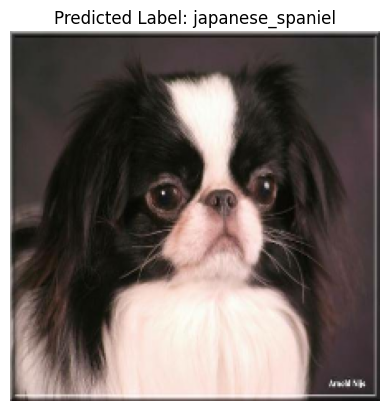

In [ ]:
# Load and preprocess the image
test_image = process_image(test_image_path)

# Make a prediction using the trained model
predictions = loaded_full_model.predict(test_image)

# Convert prediction probabilities to class label
predicted_label = unique_labels[np.argmax(predictions)]
predicted_label

# Display the image and the predicted label
import matplotlib.pyplot as plt

plt.imshow(test_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()
